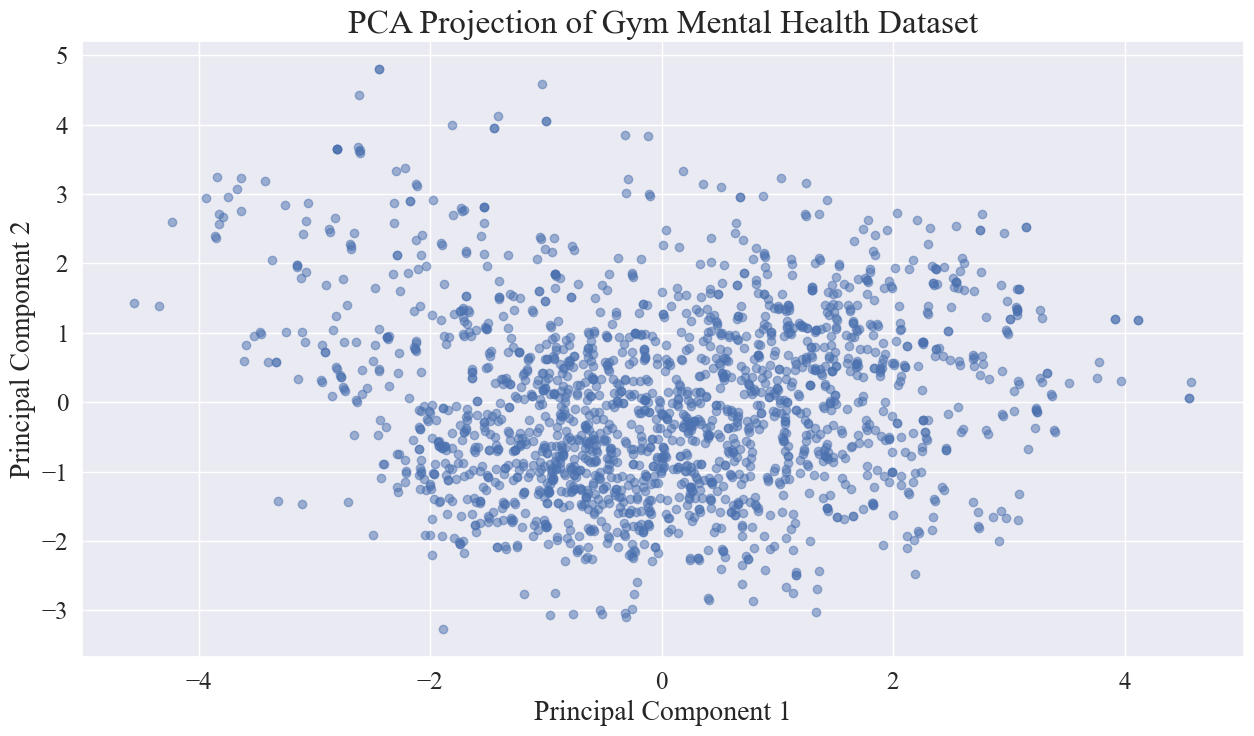

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

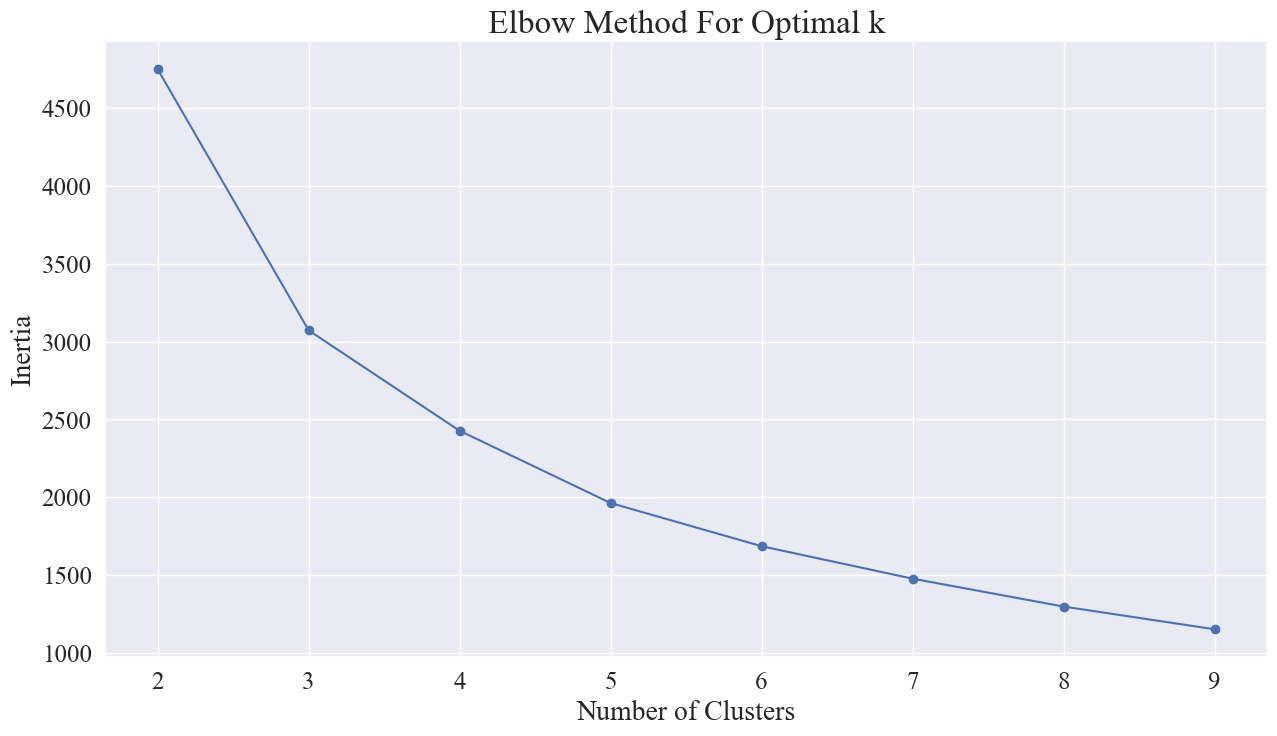

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


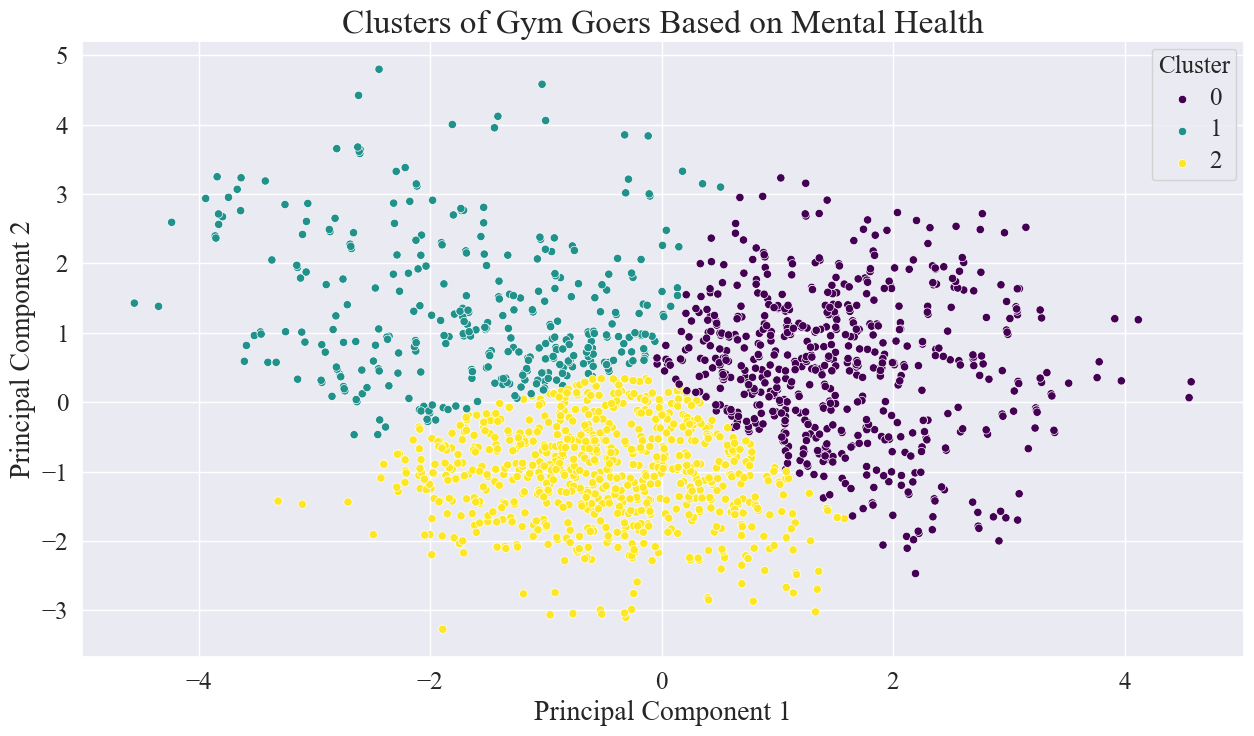

Silhouette Score: 0.39


In [10]:
# --- IMPORTS ---
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# %matplotlib inline # Use only in Jupyter Notebook
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15, 8)
matplotlib.rcParams["font.family"] = "Times New Roman"  # Set font globally

# >>> Font size boosts <<<
TITLE_SIZE  = 24
LABEL_SIZE  = 20
TICK_SIZE   = 18
LEGEND_SIZE = 18

# Apply global sizes too (plays nice with explicit sizes below)
matplotlib.rcParams.update({
    "axes.titlesize": TITLE_SIZE,
    "axes.labelsize": LABEL_SIZE,
    "xtick.labelsize": TICK_SIZE,
    "ytick.labelsize": TICK_SIZE,
    "legend.fontsize": LEGEND_SIZE
})

# --- LOAD DATA ---
df = pd.read_csv("V6 Updated_In-Depth_Analysis_of_Mental_Health_Dataset.csv")
df.columns = df.columns.str.strip()

# --- HANDLE MISSING VALUES ---
df['recovery_methods'].fillna(df['recovery_methods'].mode()[0], inplace=True)
df['post_impacts'].fillna(df['post_impacts'].mode()[0], inplace=True)
df['biggest_challenge'].fillna(df['biggest_challenge'].mode()[0], inplace=True)

# Drop unrelated columns if present
cols_to_drop = ['Column 1', 'Email address', 'By submitting, you consent to our use of your responses for research.']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# --- LABEL ENCODE CATEGORICAL FEATURES ---
le_dict = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        le_dict[col] = le  # Save encoders if needed later

# --- SCALING ---
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# --- PCA for DIMENSIONALITY REDUCTION ---
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Plot PCA-reduced data
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
plt.title("PCA Projection of Gym Mental Health Dataset", fontsize=TITLE_SIZE)
plt.xlabel("Principal Component 1", fontsize=LABEL_SIZE)
plt.ylabel("Principal Component 2", fontsize=LABEL_SIZE)
plt.tick_params(axis='both', labelsize=TICK_SIZE)
plt.show()

# --- CLUSTERING (KMeans) ---
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_components)
    inertia.append(km.inertia_)

# Elbow method
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Elbow Method For Optimal k", fontsize=TITLE_SIZE)
plt.xlabel("Number of Clusters", fontsize=LABEL_SIZE)
plt.ylabel("Inertia", fontsize=LABEL_SIZE)
plt.tick_params(axis='both', labelsize=TICK_SIZE)
plt.show()

# Fit final model (say, 3 clusters based on elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_components)

# Plot clustered data
sns.set(font="Times New Roman")  # Set font for seaborn plots
ax = sns.scatterplot(
    x=pca_components[:, 0], y=pca_components[:, 1],
    hue=df['Cluster'], palette="viridis"
)
plt.title("Clusters of Gym Goers Based on Mental Health", fontsize=TITLE_SIZE)
plt.xlabel("Principal Component 1", fontsize=LABEL_SIZE)
plt.ylabel("Principal Component 2", fontsize=LABEL_SIZE)
plt.tick_params(axis='both', labelsize=TICK_SIZE)

# Bump legend font sizes (if legend exists)
leg = ax.get_legend()
if leg is not None:
    for txt in leg.get_texts():
        txt.set_fontsize(LEGEND_SIZE)
    if leg.get_title() is not None:
        leg.get_title().set_fontsize(LEGEND_SIZE)

plt.show()

# Optional: Silhouette score
score = silhouette_score(pca_components, df['Cluster'])
print(f"Silhouette Score: {score:.2f}")


In [2]:
# Final KMeans clustering and summary block

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Remove non-numeric columns
non_numeric_cols = df.select_dtypes(include='object').columns
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')

# Drop PCA/Cluster if rerunning
df_numeric = df_numeric.drop(columns=['Cluster', 'PCA1', 'PCA2'], errors='ignore')

# Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Clustering with n_init specified
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(pca_components)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Summary by cluster
cluster_summary = df.groupby('Cluster').agg({
    'age': ['mean', 'std'],
    'scale_feelings': ['mean', 'std'],
    'exercise_timeline_weekly': ['mean', 'std'],
    'PCA1': ['mean'],
    'PCA2': ['mean'],
    'health_improvement': lambda x: x.mode()[0]
}).reset_index()

# Flatten multi-level column headers
cluster_summary.columns = ['_'.join(col).strip('_') for col in cluster_summary.columns.values]

# Show summary
print(cluster_summary)


   Cluster   age_mean    age_std  scale_feelings_mean  scale_feelings_std  \
0        0  27.024963   7.484157             4.716593            2.202373   
1        1  30.800505  14.895691             8.373737            1.533332   
2        2  23.902696   4.315455             7.162954            1.829707   

   exercise_timeline_weekly_mean  exercise_timeline_weekly_std  PCA1_mean  \
0                       3.446402                      1.540766   1.553797   
1                       5.371212                      1.167527  -1.570435   
2                       3.359906                      1.612200  -0.511423   

   PCA2_mean  health_improvement_<lambda>  
0   0.517331                            3  
1   1.319915                            0  
2  -1.025778                            4  


Gaussian Mixture Model (GMM) Clustering

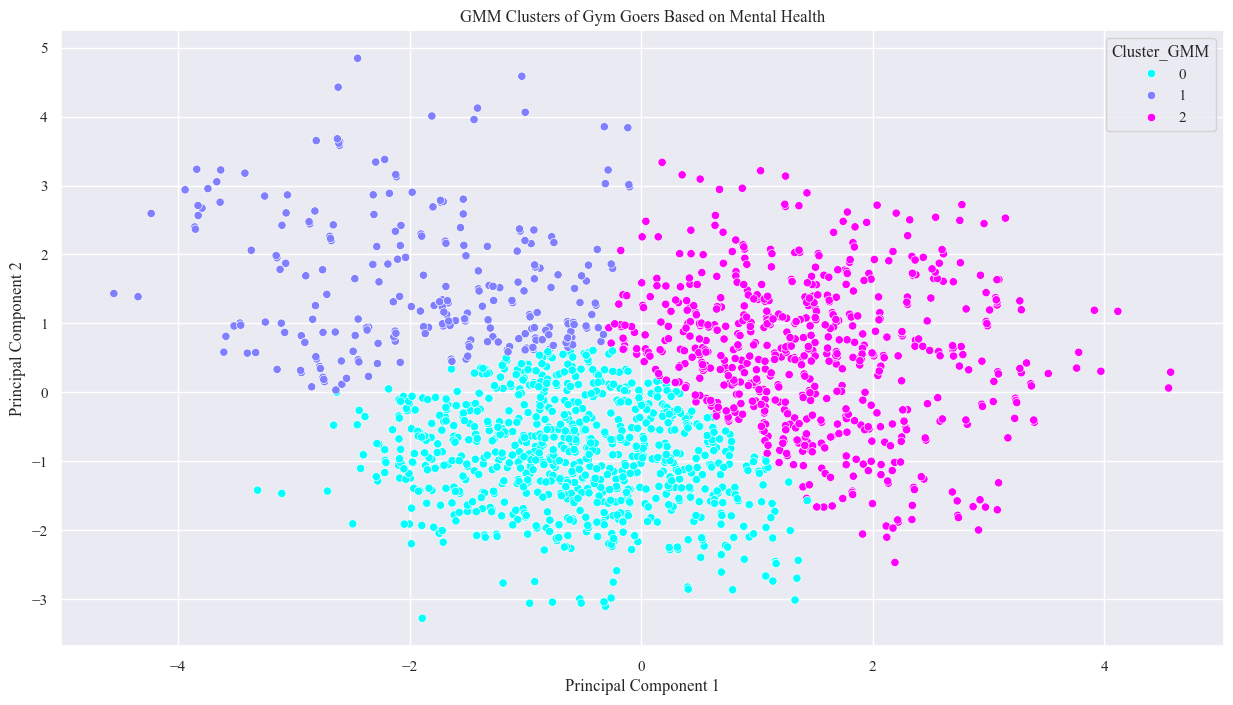

In [3]:
from sklearn.mixture import GaussianMixture

# GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(pca_components)

# Visualize GMM clusters
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster_GMM'], palette="cool")
plt.title("GMM Clusters of Gym Goers Based on Mental Health")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [4]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune these parameters!
db_labels = dbscan.fit_predict(df_scaled)

# Filter out noise (-1 label) for scoring
mask = db_labels != -1
if len(set(db_labels)) > 1 and mask.sum() > 0:
    db_score = silhouette_score(df_scaled[mask], db_labels[mask])
    print(f"🔹 DBSCAN Silhouette Score (excluding noise): {db_score:.2f}")
else:
    print("⚠️ DBSCAN found too few clusters or all data is considered noise.")


🔹 DBSCAN Silhouette Score (excluding noise): 0.84


C:\Users\User\anaconda3\envs\ml_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\User\anaconda3\envs\ml_env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


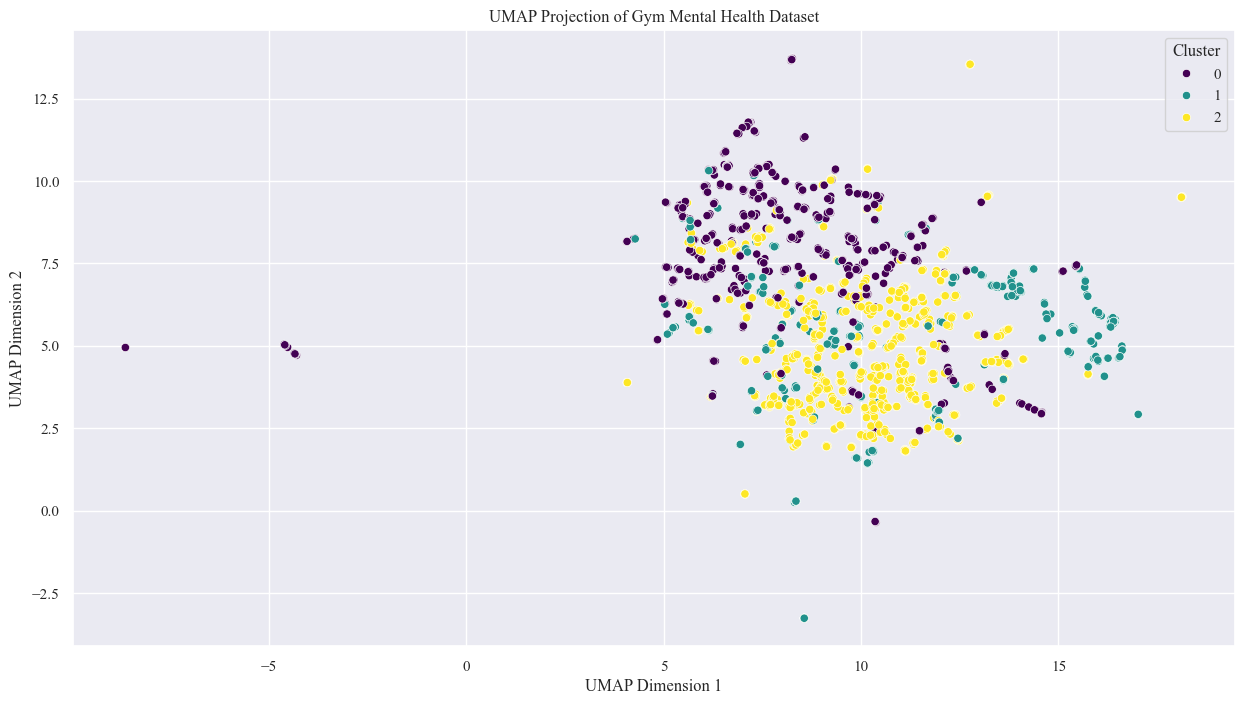

In [5]:
import umap.umap_ as umap

# UMAP projection (2D)
reducer = umap.UMAP(random_state=42)
umap_components = reducer.fit_transform(df_scaled)

# Visualize UMAP projection with existing clusters
sns.scatterplot(x=umap_components[:, 0], y=umap_components[:, 1], hue=df['Cluster'], palette="viridis")
plt.title("UMAP Projection of Gym Mental Health Dataset")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


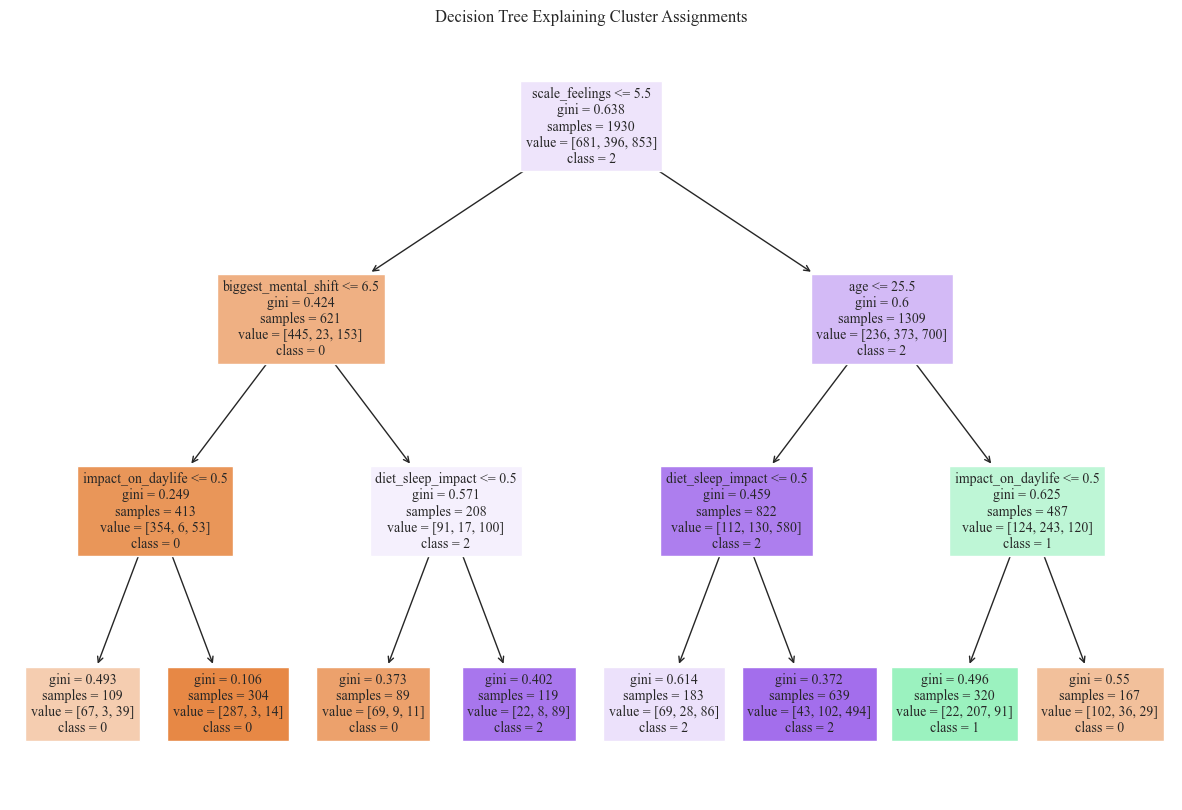

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Train a decision tree to predict clusters
X_features = df_numeric  # Exclude PCA/Cluster if needed
y_clusters = df['Cluster']

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_features, y_clusters)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=X_features.columns, class_names=['0', '1', '2'], filled=True, fontsize=10)
plt.title("Decision Tree Explaining Cluster Assignments")
plt.show()


In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette score
sil_score = silhouette_score(pca_components, df['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

# Davies-Bouldin index (lower is better)
db_score = davies_bouldin_score(pca_components, df['Cluster'])
print(f"Davies-Bouldin Score: {db_score:.3f}")


Silhouette Score: 0.388
Davies-Bouldin Score: 0.876


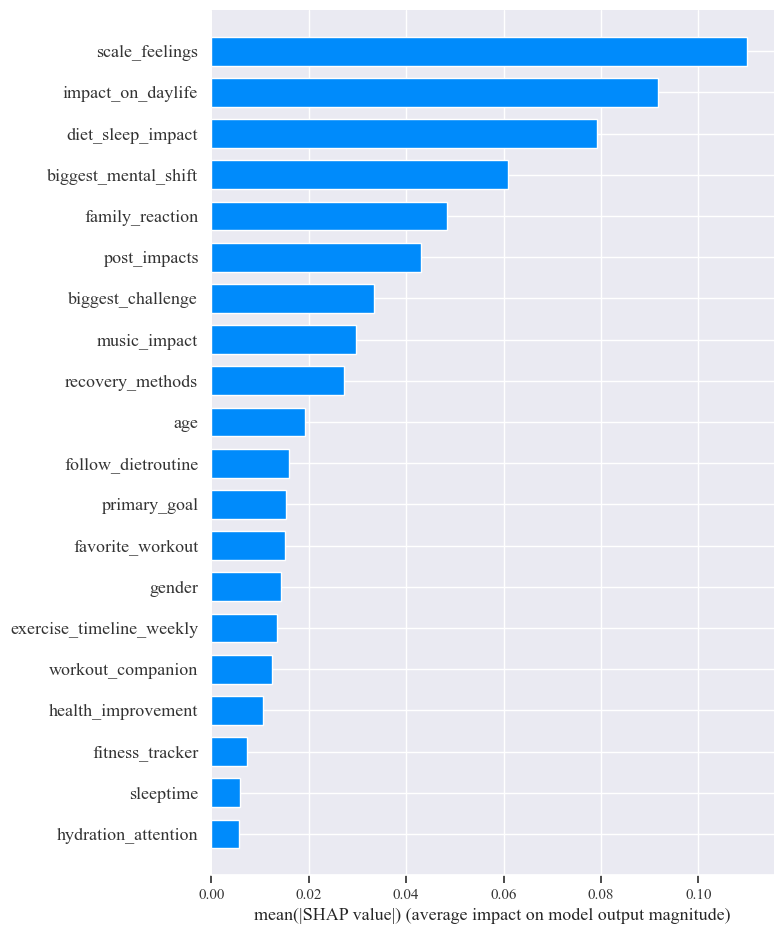

In [8]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Train RandomForest to predict clusters
rf = RandomForestClassifier(random_state=42)
rf.fit(X_features, y_clusters)

# Explain with SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_features)

# Summary plot for one class (e.g., cluster 0)
shap.summary_plot(shap_values[0], X_features, plot_type="bar", show=True)


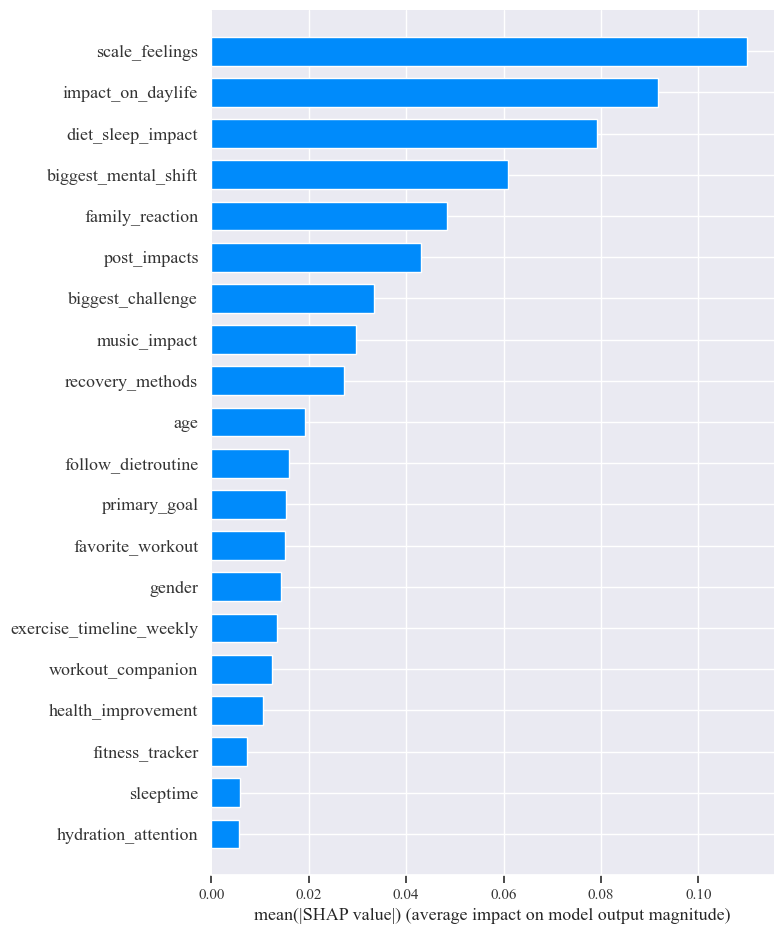

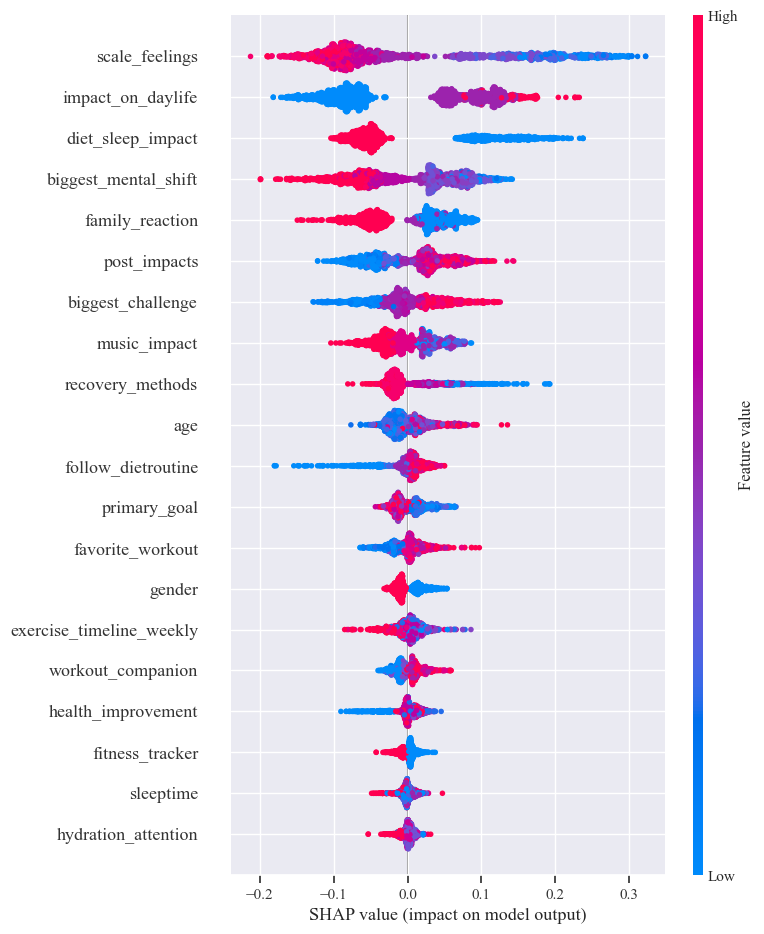

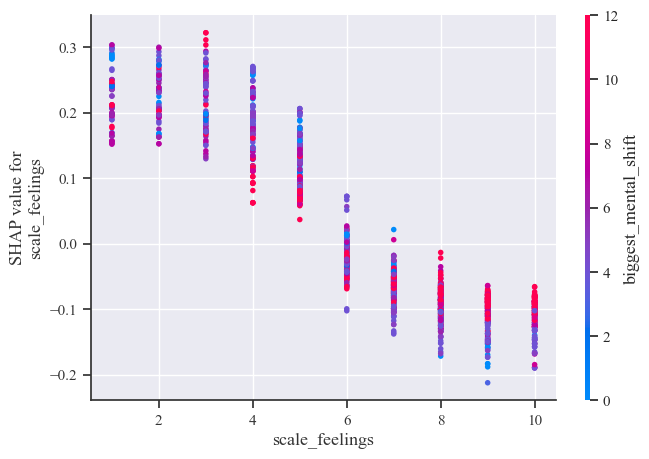

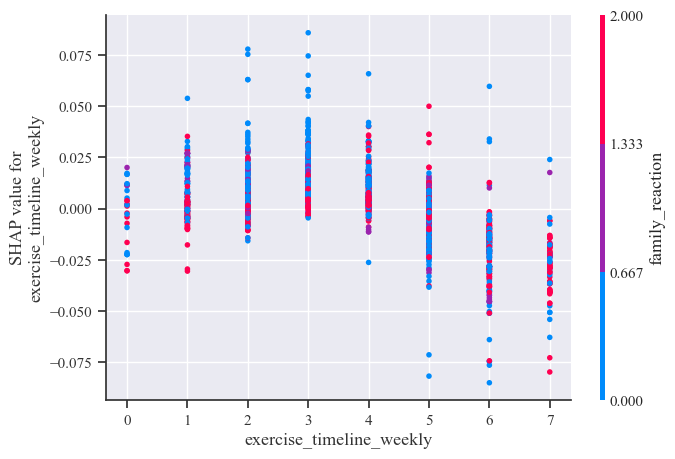

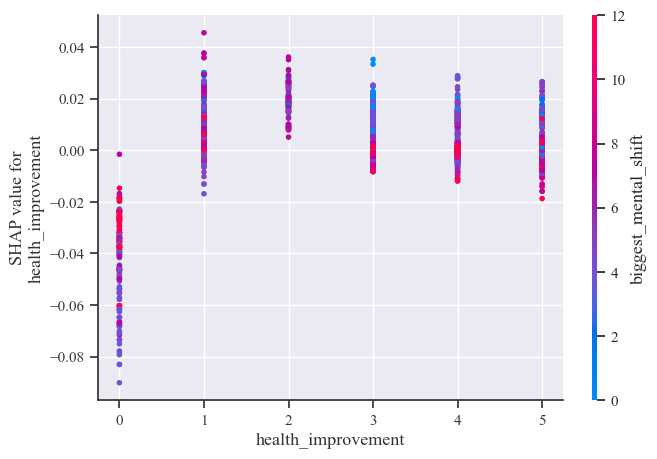

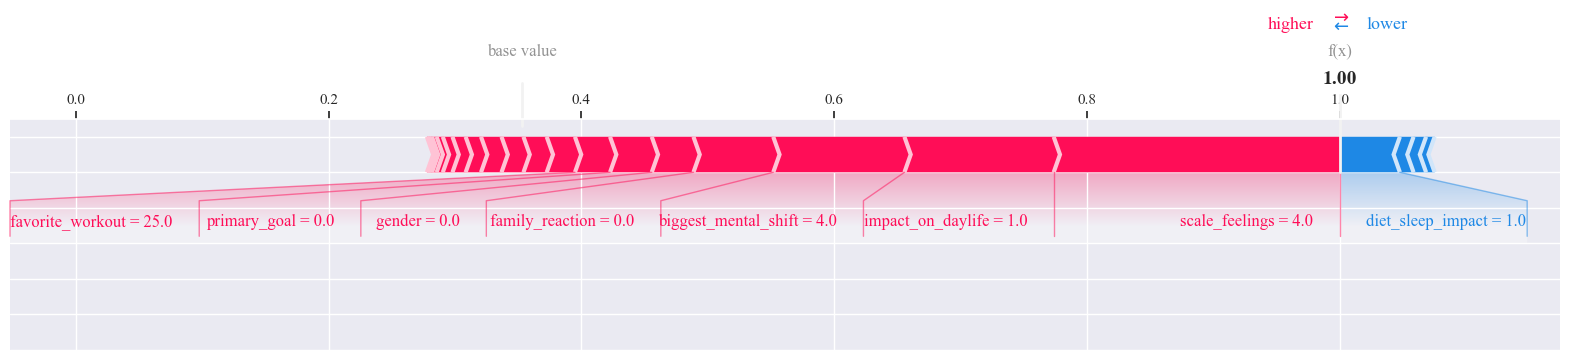

In [9]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_features, y_clusters)

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_features)

# ---------- 1. Bar Plot (Feature Importance) ----------
shap.summary_plot(shap_values[0], X_features, plot_type="bar", show=True)

# ---------- 2. Beeswarm Plot ----------
shap.summary_plot(shap_values[0], X_features)

# ---------- 3. Dependence Plots (for top 3 features) ----------
# Get feature importance order
feature_importance_order = shap_values[0].mean(axis=0).argsort()[::-1]
top_features = X_features.columns[feature_importance_order[:3]]

for feature in top_features:
    shap.dependence_plot(feature, shap_values[0], X_features)

# ---------- 4. Force Plot for a Single Instance ----------
# Optional: Use in Jupyter for interactive version
shap.initjs()

# Plot force plot for instance 0
shap.force_plot(
    explainer.expected_value[0], 
    shap_values[0][0], 
    X_features.iloc[0], 
    matplotlib=True
)

# ---------- 5. Force Plots for Multiple Instances (Optional) ----------
# for i in range(3):
#     shap.force_plot(
#         explainer.expected_value[0], 
#         shap_values[0][i], 
#         X_features.iloc[i], 
#         matplotlib=True
#     )
